In [362]:
'''Load Packages'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
from sklearn.cluster import KMeans 
import random
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [364]:
# function to transform into numerical bins by normal/gaussian distribution
def categorical_transform(col):
    classnames, factorval, rank = np.unique(col, return_inverse = True,return_counts = True)
    
      
    temp = np.sort(rank)
    temp = np.concatenate((temp[::2], temp[1::2][::-1]))
    rank = random.sample(range(1, len(temp)+1),len(temp))
    
    category_count = {}
    for i in range(len(classnames)):
        category_count[classnames[i]] = rank[i]
    
    check_list = list(col)
    for i in range(len(check_list)):
        for key, value in category_count.items():
            if check_list[i] == key:
                factorval[i] = value 
                break
    
    return category_count, factorval

In [365]:
def cat_to_names(df,references):
    ref = df.columns[df.columns.isin(references.keys())].to_list()
    temp_df = df.copy()
    for key in ref:
        vals = references[key]
        for label_key in vals.keys():
            temp_df[key] = temp_df[key].replace(vals[label_key],label_key)
    return temp_df

In [366]:
## load data set
carmax_df = pd.read_csv('CaseDataRemodeled.csv')
new_df = pd.read_csv('newdata.csv')

In [367]:
carmax_df['job_assign'] = new_df['job_assign']

In [368]:
cluster_df = carmax_df.copy().drop(['customer_age','customer_previous_purchase','customer_distance_to_dealer',
                             'post_purchase_satisfaction','vehicle_warranty_used','subsequent_purchases',
                             'purchase_price_UB','purchase_class'], axis=1)

In [369]:
## references of transformation for later 
references = {}

# transform to numerical values 
for i in cluster_df.columns:
    if cluster_df[i].dtype == 'object':
        classes = cluster_df[i]
        references[i], cluster_df[i] = categorical_transform(classes)

In [370]:
cluster_df['purchase_class'] = carmax_df['purchase_class']

In [374]:
sedan = cluster_df[cluster_df.purchase_class=='sedan'].copy().reset_index(drop = True).drop('purchase_class', axis = 1)
truck = cluster_df[cluster_df.purchase_class=='truck'].copy().reset_index(drop = True).drop('purchase_class', axis = 1)
suv = cluster_df[cluster_df.purchase_class=='suv'].copy().reset_index(drop = True).drop('purchase_class', axis = 1)
wagon = cluster_df[cluster_df.purchase_class=='wagon'].copy().reset_index(drop = True).drop('purchase_class', axis = 1)
van = cluster_df[cluster_df.purchase_class=='van'].copy().reset_index(drop = True).drop('purchase_class', axis = 1)
coupe = cluster_df[cluster_df.purchase_class=='coupe'].copy().reset_index(drop = True).drop('purchase_class', axis = 1)
convertible = cluster_df[cluster_df.purchase_class=='convertible'].copy().reset_index(drop = True).drop('purchase_class', axis = 1)

vehicle_classes = [sedan,truck,suv,wagon,van,coupe,convertible]

### Elbow Method to determine k for each cluster of vehicle class

sedan
1 : 3.4060556498632106
2 : 3.1700366306855385
3 : 3.0304470486523623
4 : 2.879813322540252
5 : 2.7855123987834696
6 : 2.731670399879779
7 : 2.6892480237694847
8 : 2.653198485818449
9 : 2.61904795850339
10 : 2.588378049015285
11 : 2.5637206939202564
12 : 2.5362898945047574
13 : 2.5052386097868404
14 : 2.477106474513768


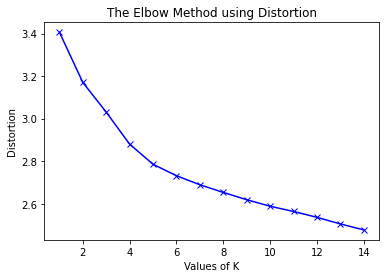

1 : 1813079.9999999865
2 : 1572372.830303212
3 : 1439153.4612503713
4 : 1312116.5860610318
5 : 1224319.8436238284
6 : 1179194.8086502573
7 : 1144605.1255004224
8 : 1113205.5607709438
9 : 1088331.3582765907
10 : 1061692.3140607686
11 : 1039117.1616089809
12 : 1019106.5840771074
13 : 999931.5203862237
14 : 977787.8883014177


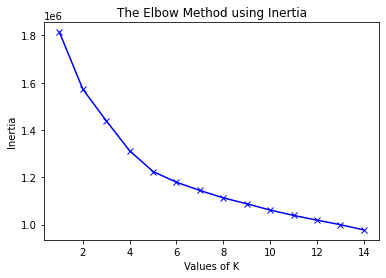

truck
1 : 3.417281264966657
2 : 3.047420735330308
3 : 2.893450985779721
4 : 2.7642025089236695
5 : 2.6542920776713177
6 : 2.5728752924063274
7 : 2.518874131955352
8 : 2.480494146842576
9 : 2.4346956557457746
10 : 2.398444936178197
11 : 2.3598860737605127
12 : 2.336577799652783
13 : 2.2993586993973856
14 : 2.2748265860360726


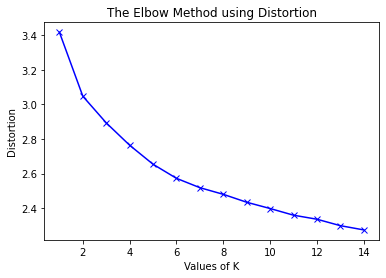

1 : 345203.99999999994
2 : 278555.0147915925
3 : 252741.03459832954
4 : 230540.914880899
5 : 211444.37205641408
6 : 199899.85627469295
7 : 191716.19793169413
8 : 185359.15769393963
9 : 179551.64591675863
10 : 174433.6706728007
11 : 169686.42508349905
12 : 165348.70885353562
13 : 160798.59010527548
14 : 157771.0108862722


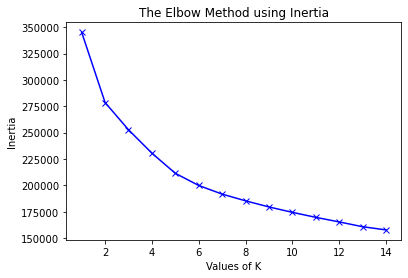

suv
1 : 3.4211537421528257
2 : 3.1760817095658966
3 : 3.044958611530908
4 : 2.930000806715878
5 : 2.8101643712418567
6 : 2.7244593984982894
7 : 2.6760424874206254
8 : 2.6456582301894684
9 : 2.6131587938642546
10 : 2.5822057315382247
11 : 2.5512990000228624
12 : 2.5297889140019154
13 : 2.5016963454761876
14 : 2.4845381136298674


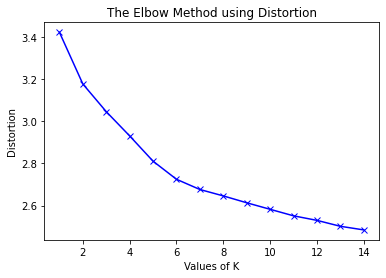

1 : 1096440.0000000047
2 : 947375.0656439967
3 : 871996.8520462046
4 : 806810.9542731134
5 : 746538.6925645293
6 : 701195.0296517482
7 : 678370.2485185238
8 : 661668.61571316
9 : 646547.5717403757
10 : 632362.0459357552
11 : 618518.690260333
12 : 607481.7264118837
13 : 595477.856964233
14 : 586135.3220874318


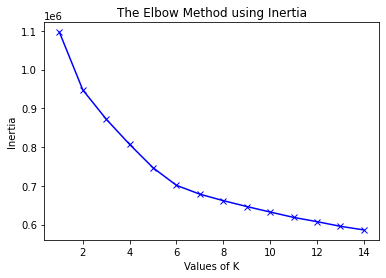

wagon
1 : 3.4130023575814574
2 : 3.1533599167540705
3 : 2.9768124999513548
4 : 2.8597917073839847
5 : 2.783816044644403
6 : 2.7130552167313886
7 : 2.669356195560952
8 : 2.63003299858375
9 : 2.5873583215557643
10 : 2.5610545461012815
11 : 2.5259180650661675
12 : 2.4906935561971335
13 : 2.466707219577979
14 : 2.445843583718527


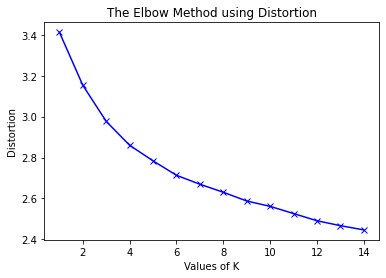

1 : 331211.99999999657
2 : 282767.2174774437
3 : 253041.7324410857
4 : 233407.85241945504
5 : 221662.7686691328
6 : 210627.6097263449
7 : 204479.33876191228
8 : 198870.60757760698
9 : 193054.41808771703
10 : 188047.11244364228
11 : 183260.7024779492
12 : 178678.02592270187
13 : 176017.57193892187
14 : 172322.58216648723


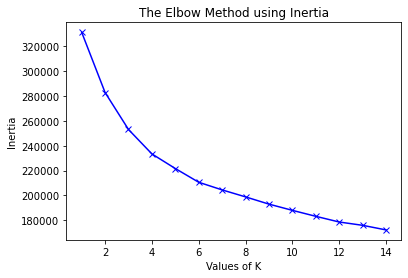

van
1 : 3.403604849793381
2 : 3.1946159327706725
3 : 3.0318135613634927
4 : 2.86383608519573
5 : 2.734141367340684
6 : 2.6629845053268006
7 : 2.6136543569448403
8 : 2.572085615656598
9 : 2.536743034799021
10 : 2.4922846593069368
11 : 2.4658229680728865
12 : 2.4302531053098297
13 : 2.404375526017932
14 : 2.383048124914738


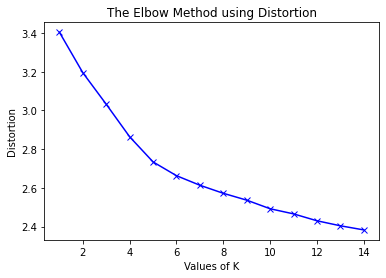

1 : 169559.99999999994
2 : 149576.5862815517
3 : 133834.90235979142
4 : 119688.6151491601
5 : 109356.39029774559
6 : 104597.35393985982
7 : 100808.95874568993
8 : 97591.27403522897
9 : 94785.7947274247
10 : 92354.78734467567
11 : 90129.31711493504
12 : 87794.35276898927
13 : 86028.72134957829
14 : 84343.15125618113


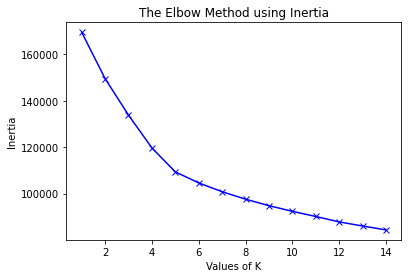

coupe
1 : 3.378118585158607
2 : 3.0179737933645354
3 : 2.820185406402533
4 : 2.7127327085471085
5 : 2.5955908288426297
6 : 2.530585404325815
7 : 2.4708489326891443
8 : 2.4361297991771798
9 : 2.386227580450112
10 : 2.3513246886962884
11 : 2.3101726769702124
12 : 2.2762758842653326
13 : 2.245933232829827
14 : 2.2088090958130064


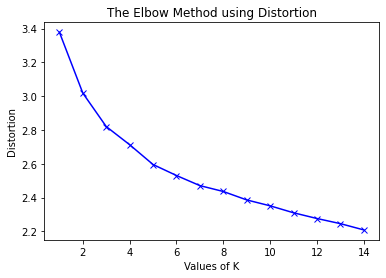

1 : 294360.00000000064
2 : 238885.8903791416
3 : 209239.58373960064
4 : 192238.0149103727
5 : 178796.75494565608
6 : 166589.97138826232
7 : 159815.44568058095
8 : 154688.62444577413
9 : 149367.6684704568
10 : 145156.44724300256
11 : 140662.45589111006
12 : 137636.9306679349
13 : 133775.91460057188
14 : 130485.7765247347


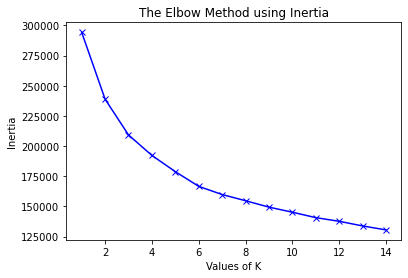

convertible
1 : 3.3915295904314773
2 : 3.1249725172714693
3 : 2.965231088132126
4 : 2.8437306670667915
5 : 2.7411239772610467
6 : 2.6613943193636835
7 : 2.608335695828426
8 : 2.5605240495636044
9 : 2.522500355368196
10 : 2.4840730940062286
11 : 2.4552763845756456
12 : 2.4241948674841884
13 : 2.400102287987438
14 : 2.3801390383003582


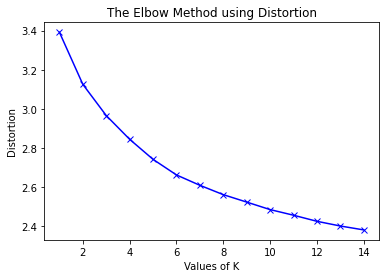

1 : 220632.00000000035
2 : 187542.89843764063
3 : 168549.66232202793
4 : 155735.9503216107
5 : 145763.75018273067
6 : 136357.3124019121
7 : 131414.22272828873
8 : 127606.29115211323
9 : 123995.68569530196
10 : 120880.39043172445
11 : 117867.93674410347
12 : 114836.67521232372
13 : 112514.61885366701
14 : 110669.09914169752


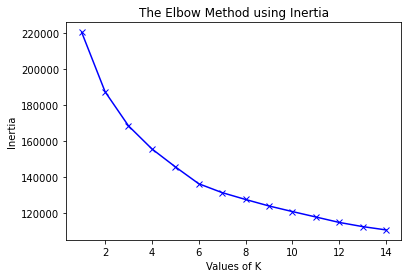

In [385]:
"""
vehicle_classes_name = ['sedan','truck','suv','wagon','van','coupe','convertible']
index = 0

for group in vehicle_classes:
    
    distortions = [] 
    inertias = []  
    mapping2 = {} 
    K = range(1,15) 

    X = group.values[:,:]
    X = np.nan_to_num(X)
    cluster_dataset = StandardScaler().fit_transform(X)
    cluster_dataset
    
    for k in K: 

        #Building and fitting the model 
        kmeanModel = KMeans(init="k-means++", n_clusters=k, n_init=50)
        kmeanModel.fit(cluster_dataset)     
      
        distortions.append(sum(np.min(cdist(cluster_dataset, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cluster_dataset.shape[0]) 
        inertias.append(kmeanModel.inertia_) 
  
        mapping1[k] = sum(np.min(cdist(cluster_dataset, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cluster_dataset.shape[0] 
        mapping2[k] = kmeanModel.inertia_ 
    
    print(vehicle_classes_name[index])
    index += 1
    
    for key,val in mapping1.items(): 
        print(str(key)+' : '+str(val)) 
        
    plt.plot(K, distortions, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Distortion') 
    plt.title('The Elbow Method using Distortion') 
    plt.show() 
    
    for key,val in mapping2.items(): 
        print(str(key)+' : '+str(val)) 
    
    plt.plot(K, inertias, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method using Inertia') 
    plt.show() 
""""


In [386]:
from sklearn.preprocessing import StandardScaler

k_values = [5,5,6,6,5,6,6]
index = 0

for group in vehicle_classes:
    X = group.values[:,:]
    X = np.nan_to_num(X)
    cluster_dataset = StandardScaler().fit_transform(X)
    cluster_dataset

    num_clusters = k_values[index]
    index += 1

    k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=50,algorithm = "elkan")
    k_means.fit(cluster_dataset)
    labels = k_means.labels_
    group["Labels"] = labels

In [387]:
sedanCluster = cluster_with_names = cat_to_names(sedan,references)
truckCluster = cluster_with_names = cat_to_names(truck,references)
suvCluster = cluster_with_names = cat_to_names(suv,references)
wagonCluster = cluster_with_names = cat_to_names(wagon,references)
vanCluster = cluster_with_names = cat_to_names(van,references)
coupeCluster = cluster_with_names = cat_to_names(coupe,references)
convertibleCluster = cluster_with_names = cat_to_names(convertible,references)

In [419]:
truckCluster

,purchase_make,purchase_model,purchase_vehicle_year,purchase_price_LB,trade_in,vehicle_financing,customer_income,customer_gender,AgeBin,made_in,job_assign,Labels
0,FORD,F150,2007,15001.0,0,0,0 - 20000,F,Fifties,UNITED STATES,"Entertainers and Performers, Sports and Relate...",3
1,NISSAN,FRONTIER,2012,20001.0,0,1,20001 - 40000,M,Twenties,JAPAN,Bakers,0
2,FORD,F150,2006,15001.0,0,1,40001 - 60000,U,Twenties,UNITED STATES,Glaziers,1
3,TOYOTA,TUNDRA,2009,20001.0,1,1,60001 - 80000,M,Thirties,JAPAN,First-Line Supervisors of Construction Trades ...,0
4,NISSAN,FRONTIER,2009,20001.0,0,1,40001 - 60000,F,Twenties,JAPAN,Real Estate Sales Agents,3
...,...,...,...,...,...,...,...,...,...,...,...,...
28762,TOYOTA,TUNDRA,2004,15001.0,0,1,40001 - 60000,M,Thirties,JAPAN,Exercise Physiologists,0
28763,CHEVROLET,SILVERADO 1500,2011,20001.0,0,1,40001 - 60000,F,Twenties,UNITED STATES,"Carpet, Floor, and Tile Installers and Finishers",3
28764,FORD,F150,2009,20001.0,1,1,100001 - 120000,M,Forties,UNITED STATES,Sales Engineers,2
28765,TOYOTA,TACOMA,2007,15001.0,0,1,20001 - 40000,M,Twenties,JAPAN,"Cutters and Trimmers, Hand",0


In [413]:
truckCluster[truckCluster.Labels==0].groupby('purchase_model').count().sort_values(by='purchase_make', ascending = False)
#cluster_df.groupby('Labels').mean()

,purchase_make,purchase_vehicle_year,purchase_price_LB,trade_in,vehicle_financing,customer_income,customer_gender,AgeBin,made_in,job_assign,Labels
purchase_model,,,,,,,,,,,
TACOMA,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
TUNDRA,2074,2074,2074,2074,2074,2074,2074,2074,2074,2074,2074
FRONTIER,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
TITAN,778,778,778,778,778,778,778,778,778,778,778
RIDGELINE,349,349,349,349,349,349,349,349,349,349,349
RAIDER,51,51,51,51,51,51,51,51,51,51,51
EQUATOR,22,22,22,22,22,22,22,22,22,22,22
BAJA,13,13,13,13,13,13,13,13,13,13,13
i-280,5,5,5,5,5,5,5,5,5,5,5


In [389]:
truck.groupby('Labels').mean()

,purchase_make,purchase_model,purchase_vehicle_year,purchase_price_LB,trade_in,vehicle_financing,customer_income,customer_gender,AgeBin,made_in,job_assign
Labels,,,,,,,,,,,
0,6.122581,372.402701,2008.739985,18798.449362,0.505926,0.723931,5.568342,2.944636,6.696774,8.000000,527.459415
1,29.957345,543.829802,2006.789252,14064.420794,0.340957,0.817876,6.573734,2.945419,6.483233,2.005051,524.118984
2,32.046502,566.962280,2010.751224,25362.359056,0.598186,0.649151,4.583501,2.937230,6.962856,2.017276,533.469767
3,18.475517,405.498990,2008.604745,18226.643614,0.415952,0.771832,6.146896,1.020949,6.855628,3.753660,529.220848
4,3.430784,58.814851,2008.961642,18978.133022,0.495943,0.784116,5.888124,2.944677,6.559872,2.000000,519.759528


In [390]:
truckCluster.groupby('Labels').agg(lambda x: pd.Series.mode(x)[0])

,purchase_make,purchase_model,purchase_vehicle_year,purchase_price_LB,trade_in,vehicle_financing,customer_income,customer_gender,AgeBin,made_in,job_assign
Labels,,,,,,,,,,,
0,TOYOTA,TACOMA,2012,20001.0,1,1,40001 - 60000,M,Forties,JAPAN,"Physicians, All Other; and Ophthalmologists, E..."
1,FORD,F150,2007,15001.0,0,1,40001 - 60000,M,Forties,UNITED STATES,General Internal Medicine Physicians
2,FORD,F150,2011,25001.0,1,1,?,M,Forties,UNITED STATES,"Physicians, All Other; and Ophthalmologists, E..."
3,FORD,F150,2011,15001.0,0,1,40001 - 60000,F,Forties,UNITED STATES,General Internal Medicine Physicians
4,DODGE,RAM 1500,2012,15001.0,0,1,40001 - 60000,M,Forties,UNITED STATES,General Internal Medicine Physicians


In [401]:
sorted(references['purchase_model'].items(), key=lambda x: x[1])

[('RAM C/V', 1),
 ('SEQUOIA', 2),
 ('YARIS', 3),
 ('BEETLE', 4),
 ('RIDGELINE', 5),
 ('VERACRUZ', 6),
 ('LX 570', 7),
 ('X3', 8),
 ('XC60', 9),
 ('C70', 10),
 ('335 HYBRID', 11),
 ('RELAY', 12),
 ('FIT', 13),
 ('OPTIMA HYBRID', 14),
 ('FJ CRUISER', 15),
 ('E-250', 16),
 ('CROSSFIRE', 17),
 ('CLK63 AMG', 18),
 ('MALIBU', 19),
 ('CX-7', 20),
 ('4RUNNER', 21),
 ('ENVOY XUV', 22),
 ('RAM 1500', 23),
 ('RANGE ROVER EVOQUE', 24),
 ('GRAND MARQUIS', 25),
 ('NITRO', 26),
 ('i-MIEV', 27),
 ('CL', 28),
 ('CAPTIVA SPORT', 29),
 ('MKT', 30),
 ('E430', 31),
 ('ML63 AMG', 32),
 ('VERONA', 33),
 ('DEVILLE', 34),
 ('C250', 35),
 ('RAV4', 36),
 ('C32 AMG', 37),
 ('GS 350', 38),
 ('YUKON', 39),
 ('ELISE', 40),
 ('JOURNEY', 41),
 ('GS 460', 42),
 ('ACCENT', 43),
 ('FIVE HUNDRED', 44),
 ('RAM 3500', 45),
 ('FOCUS', 46),
 ('325', 47),
 ('GS 430', 48),
 ('GTO', 49),
 ('EXPEDITION', 50),
 ('EXPRESS 2500', 51),
 ('GL550', 52),
 ('300ZX', 53),
 ('ILX HYBRID', 54),
 ('PRIUS PLUG IN HYBRID', 55),
 ('ZDX', 56),
 

In [400]:
references['purchase_model']

{'128': 534,
 '135': 251,
 '1M': 196,
 '200': 212,
 '3-Sep': 485,
 '300': 532,
 '300 C SRT': 120,
 '300M': 370,
 '300ZX': 53,
 '320': 341,
 '325': 47,
 '328': 144,
 '330': 116,
 '335': 610,
 '335 HYBRID': 11,
 '350Z': 344,
 '370Z': 200,
 '4RUNNER': 21,
 '5-Sep': 354,
 '500': 191,
 '525': 373,
 '528': 138,
 '530': 394,
 '535': 338,
 '540': 363,
 '545': 396,
 '550': 213,
 '626': 554,
 '640': 393,
 '640 B640': 197,
 '645': 209,
 '650': 68,
 '740': 238,
 '745': 266,
 '750': 488,
 '750 HYBRID': 397,
 '760': 440,
 '9-2X': 154,
 '911': 143,
 'A3': 292,
 'A4': 429,
 'A5': 470,
 'A6': 525,
 'A7': 605,
 'A8': 152,
 'ACADIA': 492,
 'ACCENT': 43,
 'ACCORD': 136,
 'ACCORD CROSSTOUR': 127,
 'ACCORD HYBRID': 539,
 'AERIO': 289,
 'ALERO': 345,
 'ALLROAD': 329,
 'ALPINA B7': 377,
 'ALTIMA': 383,
 'ALTIMA HYBRID': 342,
 'AMANTI': 385,
 'ARMADA': 305,
 'ASCENDER': 228,
 'ASCENDER EXT': 512,
 'ASPEN': 150,
 'ASPEN HYBRID': 381,
 'ASTRA': 552,
 'ASTRO': 405,
 'ATS': 253,
 'AURA': 630,
 'AURA HYBRID': 256,


In [421]:
export_groups = [sedanCluster,truckCluster,suvCluster,wagonCluster,vanCluster,coupeCluster,convertibleCluster]

In [454]:
cluster_names = ['sedanCluster','truckCluster','suvCluster','wagonCluster','vanCluster','coupeCluster'
                        ,'convertibleCluster']
index = 0
for group in export_groups:
    for x in group.Labels.unique():
        group[group.Labels==x].to_csv(cluster_names[index]+str(x)+'.csv')
    index += 1